### 1. 추천 시스템의 개요와 배경

#### 추천 시스템의 개요
아마존과 같은 전자 상거래 업체 ~ 유튜브, 애플 뮤직 등 콘텐츠 포털까지   
추천 시스템을 통해 사용자의 취향을 이해하고 맞춤 상품과 콘텐츠 제공해   
조금이라도 오래 사이트에 고객을 머무르게 하기 위해 전력을 기울이고 있음

한정된 시간이라는 제약을 가진 상황에서 너무 많은 상품과 콘텐츠는   
오히려 사용자가 어떤 상품을 골라야 할지에 대한 압박감을 느끼게 만듦   
-> 추천 시스템을 통해 이러한 상황 타개 가능 

**추천 시스템 구성 데이터 예시**
1. 사용자가 어떤 상품을 구매했는지?
2. 사용자가 어떤 상품을 둘러보거나 장바구니에 넣었는지?
3. 사용자가 평가한 영화 평점은 ? 제품 평가는 ? 
4. 사용자가 스스로 작성한 자신의 취향은?
5. 사용자가 무엇을 클릭했는지?


**추천 시스템의 유형**
1. 콘텐츠 기반 필터링(Content based Filtering)
2. 협업 필터링(Collaborative Filtering)
    2-1. 최근접 이웃(Nearest Neighbor) 협업 필터링
    2-2. 잠재 요인(Latent Factor) 협업 필터링
   
- 추천 시스템 초창기에는 콘텐츠 기반 필터링/최근접 이웃 기반 협업 필터링이 주로 사용됐지만, 넷플릭스 추천시스템 경연 대회에서 행렬 분해(Matrix Factorization)기법을 이용한 잠재 요인 협업 필터링 방식이 우승하면서 대부분 이 방식이 적용되고 있음
- 아마존의 경우 아이템 기반 최근접 이웃 협업 필터링 방식 사용
- 최근에는 개인화 특성 강화를 위해 하이브리드 형식으로 사용하는 경우도 늘고있음

### 2. 콘텐츠 기반 필터링 추천 시스템
사용자가 특정 아이템을 매우 선호하는 경우,   
그 아이템과 비슷한 콘텐츠를 가진 다른 아이템 추천하는 방식   
ex) 사용자가 특정 영화에 높은 평점을 줬다면 그 영화의 장르, 출연 배우, 감독, 영화 키워드 등 콘텐츠와 유사한 다른 영화 추천해주는 방식

### 3. 최근접 이웃 협업 필터링
사용자가 아이템에 매긴 평점 정보나 상품 구매 이력과 같은    
사용자 행동 양식(User Behavior)만을 기반으로 추천을 수행하는 방식   

주요 목표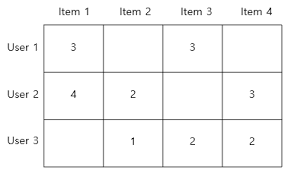
사용자-아이템 평점 매트릭스와 같은 축적된 사용자 행동 데이터를 기반으로   
사용자가 아직 평가하지 않은 아이템을 예측 평가(Predicted Rating)하는 것

최근접 이웃 방식/잠재 요인 방식 모두 사용자-아이템 평점 행렬 데이터에만 의지해 추천 수행

**사용자-아이템 평점 행렬**
- 행 : 개별 사용자
- 열 : 개별 아이템
- 값 : 평점 
- 사용자가 아이템에 대한 평점을 매기는 경우가 많지 않기 때무에 희소 행렬(Sparse Matrix) 특성을 가지고 있음
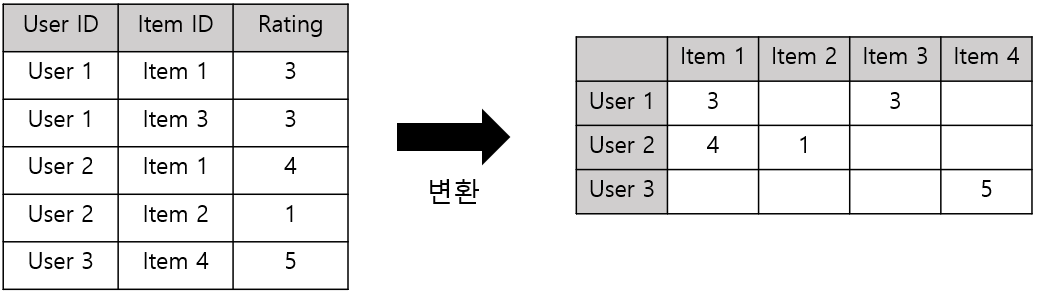


판다스의 pivot_table()같은 함수를 이용해 레코드 레벨 형태 데이터 -> 행렬 형태로 변환 가능

**최근접 이웃 협업 필터링(=메모리 협업 필터링)**
1. 사용자 기반(User-User) : 사용자와 비슷한 고객들이 구매한 상품 추천
    - 특정 사용자와 유사한 다른 사용자들을 TOP-N으로 선정해 이 사용자가 좋아하는 아이템을 추천하는 방식   
    즉, 특정 사용자와 타 사용자 간의 유사도(Similarity)를 측정한 뒤 가장 유사도가 높은 TOP-N 사용자 추출해 그들이 선호하는 아이템 추천
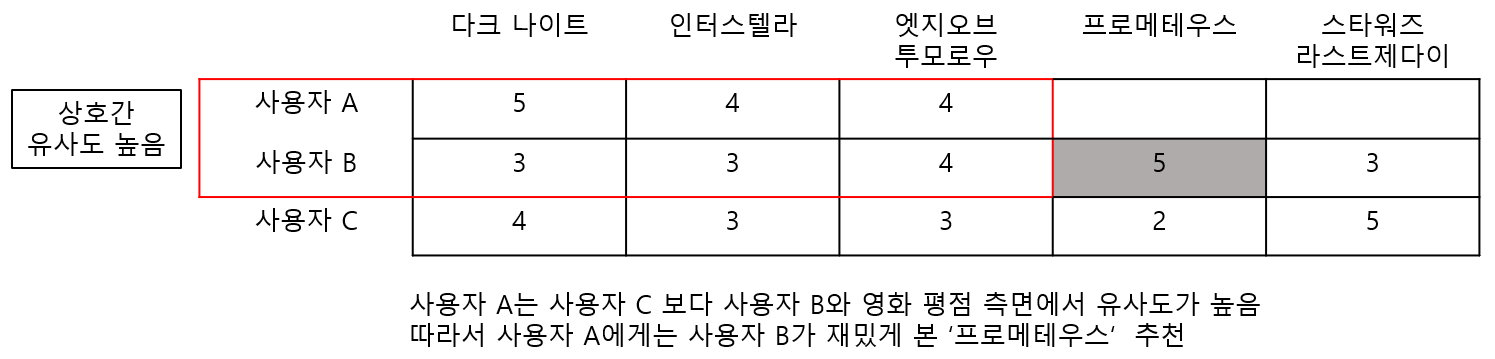


2. 아이템 기반(Item-Item) : 해당 상품을 구매한 고객들의 구매 상품 추천
아이템 간 속성이 얼마나 비슷한지 기반으로 추천 XXX   
아이템이 가지는 속성과 상관없이 사용자들이 그 아이템을 좋아하는지/싫어하는지의 평가 척도가 유사한 아이템을 추천하는 기준이 되는 알고리즘
- 사용자 기반 최근접 이웃 데이터 세트와 행과 열이 서로 반대임
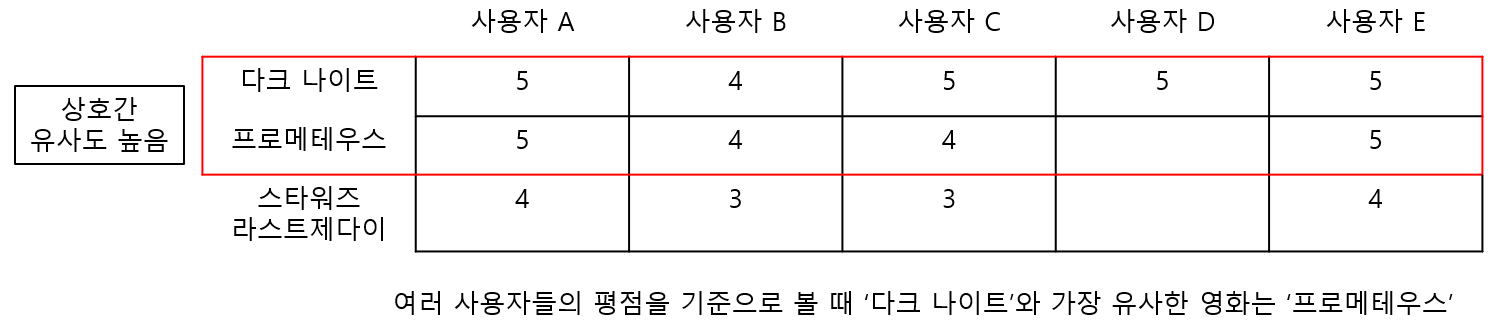


일반적으로 사용자 기반보다는 아이템 기반 협업 필터링의 정확도가 더 높음   
비슷한 영화를 좋아한다고해서 사람들의 취향이 비슷하다고 판단하기 어려운 경우가 많기 때문임 ex) 취향과 관계 없이 유명한 영화를 관람하는 경우 , 평점을 매긴 영화가 많지 않아 비교가 어려운 경우


유사도 측정 : 주로 코사인 유사도 이용

### 4. 잠재 요인 협업 필터링

#### 잠재 요인 협업 필터링의 이해
사용자-아이템 평점 매트릭스 속에 숨어 있는 잠재 요인을 추출해 추천 예측 할 수 있게 하는 기법       
대규모 다차원 행렬을 SVD와 같은 차원 감소 기법으로 분해하는 과정에서   
잠재요인 추출 == 행렬분해      


잠재요인을 기반으로 다차원 희소 행렬인 사용자-아이템 행렬을   
저차원 밀집 행렬의 사용자-잠재요인 행렬과 잠재요인 - 아이템 행렬로 분해   
분해한 두 행렬의 내적을 통해 새로운 사용자-아이템 평점 행렬 만들어    
사용자가 아직 평점을 부여하지 않은 아이템에 대한 예측 평점 생성하는 것
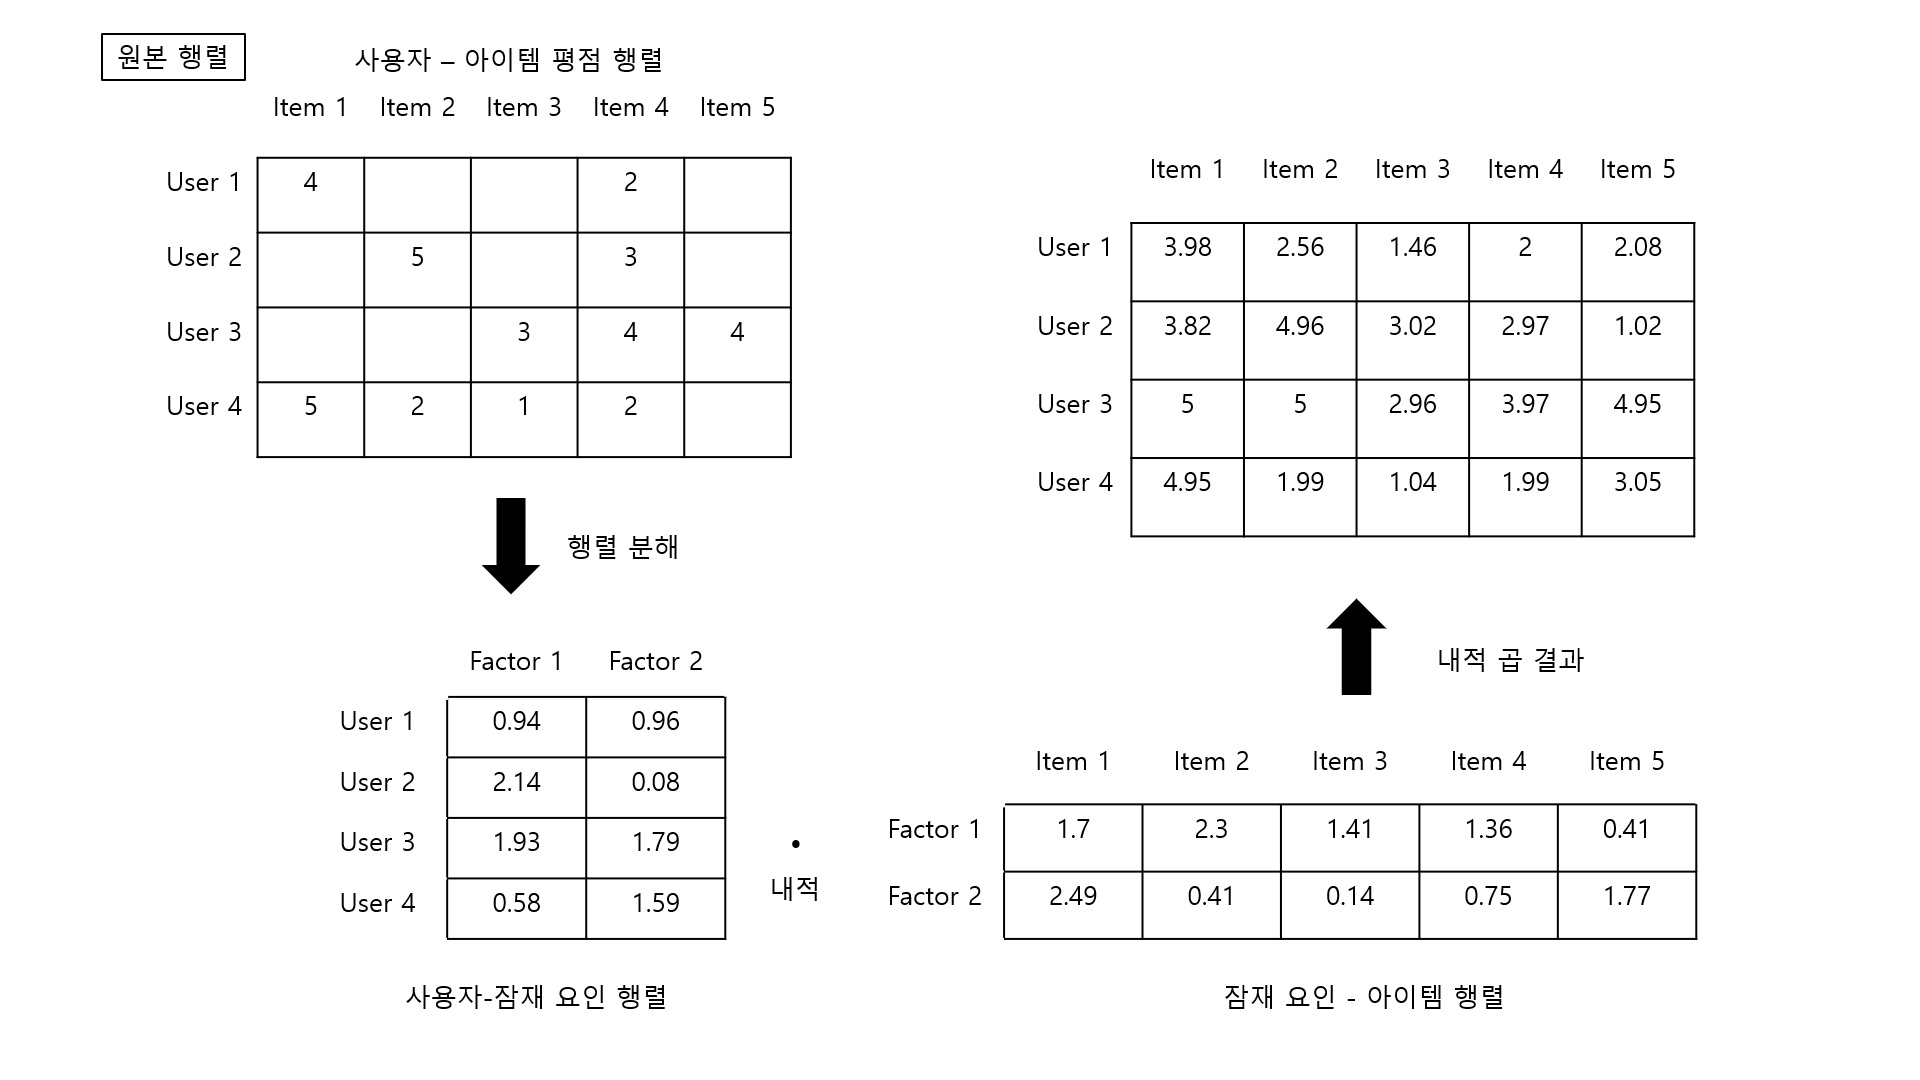
사용자-아이템 평점 행렬 R에서 사용자(User)의 아이템(Item)에 대한 평점은 R(u, i)입니다. (u는 사용자 아이디, i는 아이템 아이디)

사용자-잠재 요인 행렬(사용자의 영화 장르별 선호도) P의 factor 1을 액션 선호도, factor 2를 로맨스 선호도로 가정

아이템-잠재 요인 행렬(영화의 장르별 특성값) Q의 factor 1은 액션 요소 값, factor 2는 로맨스 요소 값으로 설정
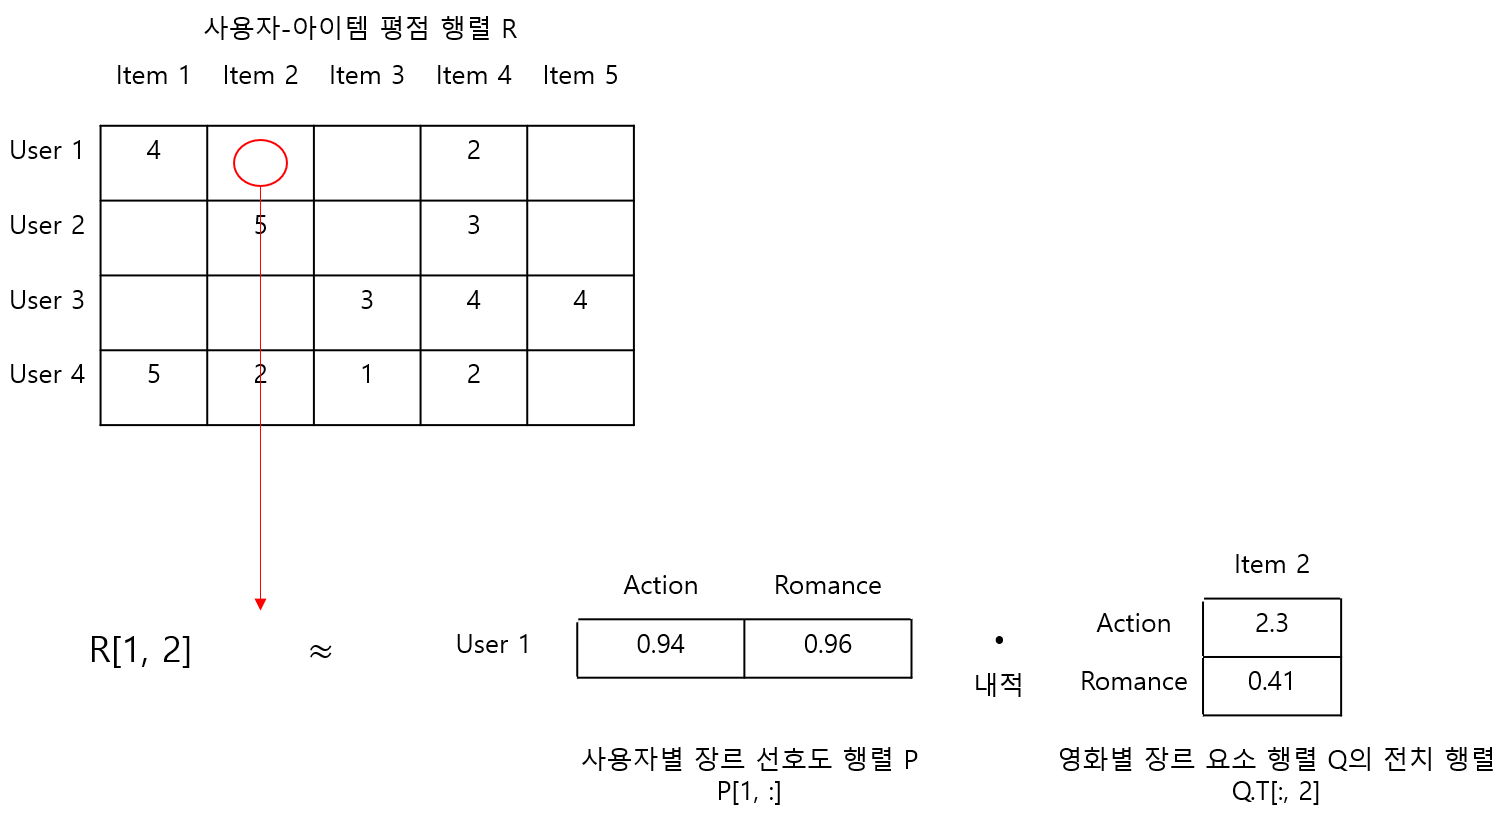
R(1, 2)는 행렬 분해된 P 행렬의 User 1 벡터와 Q.T 행렬의 Item 2 벡터의 내적 결괏값인 2.56으로 예측할 수 있음

#### 행렬 분해의 이해
다차원 매트릭스를 저차원 매트릭스로 분해하는 기법   
ex) SVD ,NFM


M개의 사용자(User) 행과 N개의 아이템(Item) 열을 갖는 평점 행렬 R은 M X N 차원으로 구성되며, 행렬 분해를 통해 사용자-잠재 요인 행렬 P(M X K 차원), 잠재 요인-아이템 행렬 Q.T(K X N 차원)으로 분해
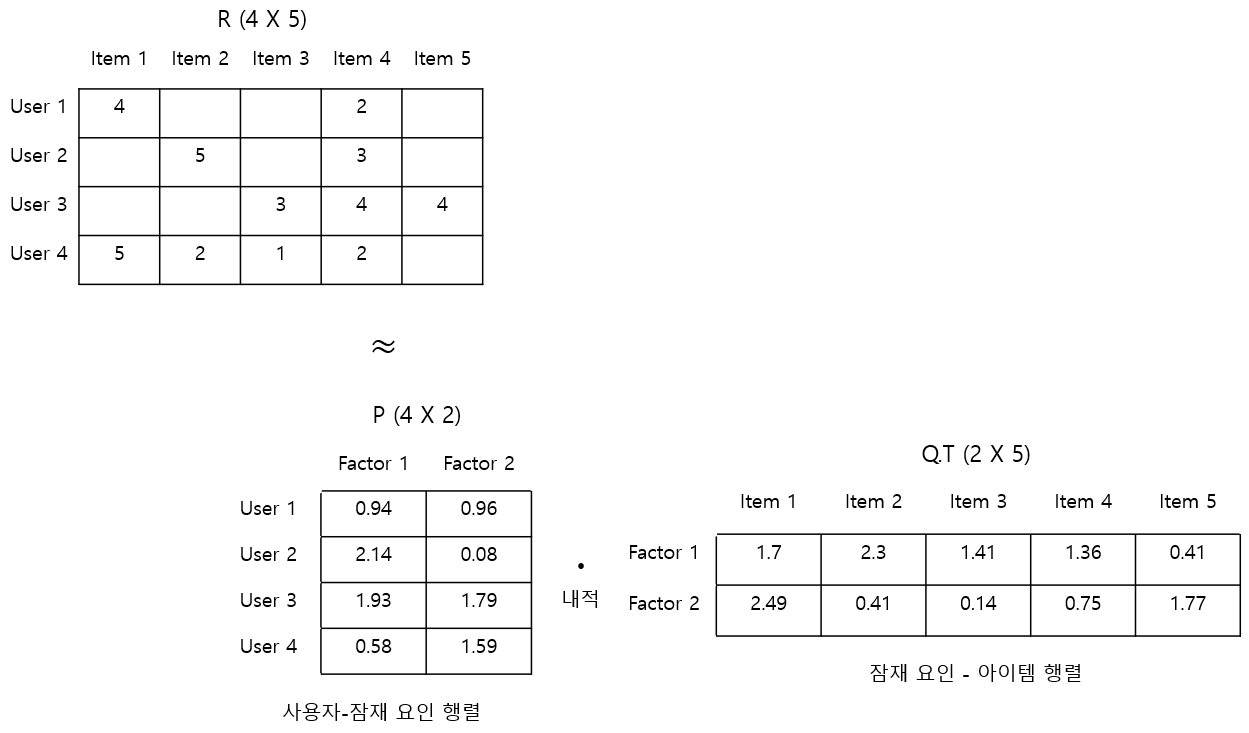
R 행렬의 u행 사용자와 i 열 아이템 위치에 있는 평점 데이터를 r(u, i)라고 하면 다음과 같이 계산할 수 있음
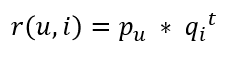
아직 사용자가 평가하지 않은 아이템에 대한 평점도 잠재 요인으로 분해된 P 행렬과 Q 행렬을 이용해 예측할 수 있음   
따라서 사용자-아이템 평점 행렬의 미정 값을 포함한 모든 평점 값은 행렬 분해를 통해 얻어진 P 행렬과 Q.T 행렬의 내적을 통해 예측 평점으로 다시 계산할 수 있음
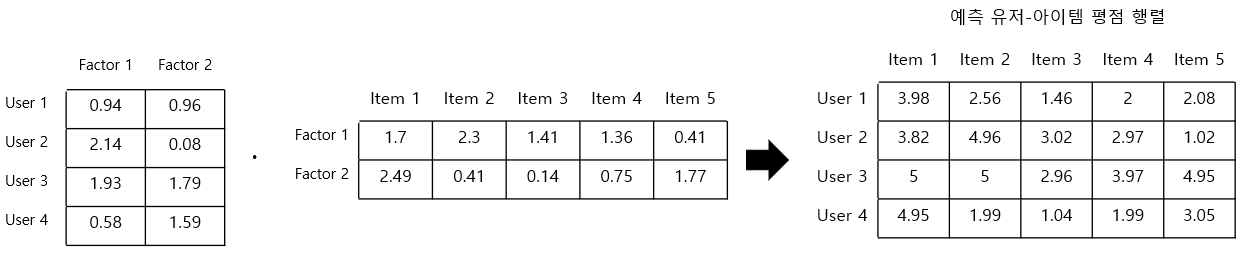

SVD의 경우 널(NaN) 값이 없는 행렬에만 적용할 수 있기 때문에 평점이 없는 R 행렬에는 SVD 방식으로 분해할 수 없음

이러한 경우에는 확률적 경사 하강법(SGD, Stochastic Gradient Descent)이나 ALS(Alternating Least Squares) 방식을 사용함



#### 확률적 경사 하강법을 이용한 행렬 분해
확률적 경사 하강법을 이용한 행렬 분해는 P와 Q 행렬로 계산된 예측 R 행렬 값이 실제 R 행렬 값과 가장 최소의 오류를 가질 수 있도록 반복적인 비용 함수 최적화를 통해 P와 Q를 유추해내는 것

**확률적 경사 하강법을 이용한 행렬 분해 절차**
1. P와 Q를 임의의 값을 가진 행렬로 설정합니다.
2. P와 Q.T 값을 곱해 예측 R 행렬을 계산하고 오류 값을 계산합니다.
3. 이 오류 값을 최소화할 수 있도록 P와 Q 행렬을 각각 업데이트 합니다.
4. 만족할만한 오류 값을 가질 때까지 2, 3번 작업을 반복하면서 P와 Q 값을 업데이트합니다.

실제 값과 예측값의 오류 최소화와 L2 규제를 고려한 비용 함수식
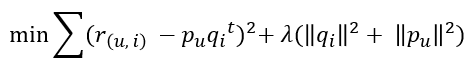
위 비용 함수를 최소화하기 위해 업데이트 되는image와 image는 다음과 같이 계산할 수 있습니다.
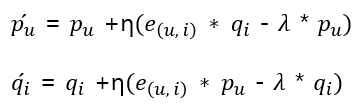
$p_u$: P 행렬의 사용자 U행 벡터   
$q_i^t$: Q 행렬의 아이템 i행의 전치 벡터   
$r(u,i)$: 실제 R 행렬의 u행, i열에 위치한 값   
$\hat{r}(u,i)$: 예측 행렬 image의 u행, i열에 위치한 값   
$e(u,i)$: u행, i열에 위치한 실제 행렬 값과 예측 행렬 값의 차이 오류   
$\eta$: SGD 학습률   
$\lambda$: L2 규제 계수   

평점행렬을 경사 하강법을 이용해 행렬 분해하는 것도 회귀 - 경사 하강법에서 회귀 계수의 업데이트 값(w1_update, w0_update)을 구해 이 업데이트 값을 반복적으로 적용하는 것과 비슷함

**SGD를 이용해 분해하려는 원본 행렬 R을 P와 Q로 분해한 뒤,    
다시 P와 Q.T의 내적으로 예측 행렬 구현**

In [12]:
# 원본 행렬 R을 미정인 널 값을 포함해 생성하고 
# 분해 행렬 P와 Q는 정규 분포를 가진 랜덤 값으로 초기화
# 잠재 요인 차원은 3차원으로 설정
import numpy as np

R = np.array([[4,np.NaN,np.NaN,2,np.NaN],
             [np.NaN,5,np.NaN,3,1],
             [np.NaN,np.NaN,3,4,4],
             [5,2,1,2,np.NaN]])
num_users, num_items = R.shape
K=3

np.random.seed(1)
P = np.random.normal(scale=1./K, size=(num_users,K))
Q = np.random.normal(scale=1./K, size=(num_items,K))

In [13]:
# 실제 R 행렬과 예측 행렬의 오차 구하는 함수 정의 
# 널이 아닌 값의 행렬 값의 위치 인덱스 추출해 이 인덱스에 있는 
# 실제 R 행렬값과 분해된 P,Q행렬을 이용해 다시 조합도니 예측행렬갑스이 RMSE 반환
from sklearn.metrics import mean_squared_error

def get_rmse(R,P,Q,non_zeros):
    error = 0
    full_pred_matrix = np.dot(P,Q.T) # 분해된 행렬 내적해 예측 R 행렬 생성
    
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
    mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)
    
    return rmse

In [14]:
# SGD 기반 분해 수행
# R > 0 인 행 위치, 열 위치, 값을 non_zeros 리스트에 저장
non_zeros = [(i,j,R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j]>0]

steps = 1000
learning_rate = 0.01
r_lambda = 0.01

# SGD 기법으로 P와 Q 행렬 계속 업데이트
for step in range(steps):
    for i,j,r in non_zeros:
        eij = r - np.dot(P[i,:], Q[j,:].T)
        # Regularization을 반영한 SGD 업데이트 공식 적용
        P[i,:] = P[i,:] + learning_rate*(eij*Q[j,:] - r_lambda*P[i,:])
        Q[j,:] = Q[j,:] + learning_rate*(eij*P[i,:] - r_lambda*Q[j,:])
        
        rmse = get_rmse(R,P,Q,non_zeros)
        if(step % 50) == 0:
            print('### iteration step : ', step, 'rmse :', rmse)

### iteration step :  0 rmse : 3.261355059488935
### iteration step :  0 rmse : 3.26040057174686
### iteration step :  0 rmse : 3.253984404542389
### iteration step :  0 rmse : 3.2521583839863624
### iteration step :  0 rmse : 3.252335303789125
### iteration step :  0 rmse : 3.251072196430487
### iteration step :  0 rmse : 3.2492449982564864
### iteration step :  0 rmse : 3.247416477570409
### iteration step :  0 rmse : 3.241926055455223
### iteration step :  0 rmse : 3.2400454107613084
### iteration step :  0 rmse : 3.240166740749792
### iteration step :  0 rmse : 3.2388050277987723
### iteration step :  50 rmse : 0.5003190892212748
### iteration step :  50 rmse : 0.5001616291326989
### iteration step :  50 rmse : 0.49899601202578087
### iteration step :  50 rmse : 0.4988483450145831
### iteration step :  50 rmse : 0.49895189256631756
### iteration step :  50 rmse : 0.49833236830090993
### iteration step :  50 rmse : 0.4984148489378701
### iteration step :  50 rmse : 0.497925995802408

### iteration step :  650 rmse : 0.016674291334806343
### iteration step :  650 rmse : 0.016782895588885082
### iteration step :  650 rmse : 0.016645698091647773
### iteration step :  650 rmse : 0.01656714079916223
### iteration step :  650 rmse : 0.016680091021598568
### iteration step :  650 rmse : 0.016698554271430792
### iteration step :  650 rmse : 0.016511017732427972
### iteration step :  650 rmse : 0.016491228766905293
### iteration step :  650 rmse : 0.01618054419796173
### iteration step :  650 rmse : 0.01631111150707529
### iteration step :  650 rmse : 0.01639316772050061
### iteration step :  650 rmse : 0.01664473691247669
### iteration step :  700 rmse : 0.0166383624426085
### iteration step :  700 rmse : 0.016741936743323586
### iteration step :  700 rmse : 0.016603524189001625
### iteration step :  700 rmse : 0.016526454393300468
### iteration step :  700 rmse : 0.016639792083379498
### iteration step :  700 rmse : 0.016657201345297346
### iteration step :  700 rmse : 0.

In [15]:
# 분해된 P와 Q 함수를 P*Q.T로 예측 행렬 만들기
pred_matrix = np.dot(P, Q.T)
print('예측 행렬:\n',np.round(pred_matrix,3))
# 원본 행렬과 비교 시 널이 아닌 값은 큰 차이가 나지 않고, 널인 값은 새로운 예측값으로 채워짐

예측 행렬:
 [[3.991 0.897 1.306 2.002 1.663]
 [6.696 4.978 0.979 2.981 1.003]
 [6.677 0.391 2.987 3.977 3.986]
 [4.968 2.005 1.006 2.017 1.14 ]]


### 5. 콘텐츠 기반 필터링 실습 - TMDB 5000 영화 데이터 세트

#### 장르 속성을 이용한 영화 콘텐츠 기반 필터링
영화간의 유사성 판단 기준이 영화를 구성하는 다양한 콘텐츠(장르,감독,배우,평점,키워드,영화설명)를 기반으로 하는 방식

장르 칼럼 값의 유사도 비교 후 그 중 높은 평점을 가지는 영화 추천하는 방식

#### 데이터 로딩 및 가공

In [16]:
import pandas as pd
import numpy as np
import warnings; warnings.filterwarnings('ignore')

movies = pd.read_csv('./data/tmdb_5000_movies.csv')
print(movies.shape)
movies.head(1)
# 4803개의 레코드와 20개의 피처로 구성
# 영화 제목,개요,인기도,평점,투표수,예산,키워드 등 다양한 메타 정보 존재

(4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [17]:
# 주요 칼럼만 추출해 새로운 데이터프레임 만들기
movies_df = movies[['id','title','genres','vote_average','vote_count',
                   'popularity','keywords','overview']]

genres, keywords 등의 칼럼은 리스트 내부에 여러 개의 딕셔너리가 있는 형태의 문자열로 표기 돼있음 -> 필요한 정보 추출을 위한 가공 필요

In [18]:
# 형태 확인하기
pd.set_option('max_colwidth',100)
movies_df[['genres','keywords']][:1]
# 개별 장르의 명칭을 딕셔너리 키인 name으로 추출 가능

,genres,keywords
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""sp..."


In [19]:
#개별 장르 파이썬 리스트 객체로 추출
from ast import literal_eval # 문자열을 객체로 변환
movies_df['genres'] = movies_df['genres'].apply(literal_eval)
movies_df['keywords'] = movies_df['keywords'].apply(literal_eval)

In [23]:
# 장르명만 리스트 객체로 추출
movies_df['genres'] = movies_df['genres'].apply(lambda x : [y['name'] for y in x])
movies_df['keywords'] = movies_df['keywords'].apply(lambda x : [y['name'] for y in x])
movies_df[['genres','keywords']][:1]

,genres,keywords
0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colony, society, space travel, futuristic, romance, spa..."


#### 장르 콘텐츠 유사도 측정
genres를 문자열로 변경한 뒤 이를 CountVectorizer로 피처 벡터화한 행렬 데이터 값을 코사인 유사도로 비교

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer 적용을 위해 공백 문자로 word 단위 구분되는 문자열로 변환
# 리스트 객체 내 개별 값을 연속된 문자열로 변환
movies_df['genres_literal'] = movies_df['genres'].apply(lambda x: (' ').join(x))
count_vect = CountVectorizer(min_df=0, ngram_range=(1,2))
genre_mat = count_vect.fit_transform(movies_df['genres_literal'])
print(genre_mat.shape) # 4803개의 레코드와 276개의 개별 단어 피처로 구성된 피처 벡터 행렬 만들어짐

(4803, 276)


**코사인 유사도**   
cosine_similarity() : 기준 행과 비교 행의 코사인 유사도를 행렬 형태로 반환하는 함수
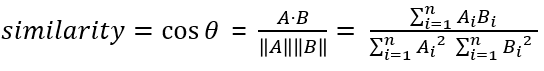

In [25]:
from sklearn.metrics.pairwise import cosine_similarity

genre_sim = cosine_similarity(genre_mat, genre_mat)
print(genre_sim.shape)
print(genre_sim[:2])

(4803, 4803)
[[1.         0.59628479 0.4472136  ... 0.         0.         0.        ]
 [0.59628479 1.         0.4        ... 0.         0.         0.        ]]


- movies_df의 개별 레코드에 대해 가장 장르 유사도가 높은 순으로 다른 레코드 추출
- genre_sim 객체의 기준 행별로 비교 대상이 되는 행의 유사도 값이 높은 순으로 정렬된 행렬의 위치 인덱스 값 추출
- argsort()[:,::-1] -> 유사도가 높은 순으로 정리된 genre_sim 객체의 비교 행 위치 인덱스 값 얻을 수 있음

In [26]:
genre_sim_sorted_ind = genre_sim.argsort()[:,::-1]
print(genre_sim_sorted_ind[:1])
# 0번 레코드의 경우 자기 자신 제외하고 3494번 , 813번 순으로 유사도가 높은 레코드임을 의미

[[   0 3494  813 ... 3038 3037 2401]]


#### 장르 콘텐츠 필터링을 이용한 영화 추천

In [27]:
# 장르 유사도에 따라 영화 추천하는 함수 생성
# 기반 데이터, 유사도 인덱스 데이터, 영화 제목, 추천할 영화 건수 입력
def find_sim_movie(df, sorted_ind, title_name, top_n=10):
    title_movie = df[df['title'] == title_name]
    

    title_index = title_movie.index.values
    # sorted_ind 인자로 입력된 장르 유사도 객체에서 유사도 순으로 top_n개 index 추출
    similar_indexes = sorted_ind[title_index, :(top_n)]
    
    # 추출된 top_n index는 2차원 데이터이므로 
    # 데이터 프레임에서 인덱스로 사용하기 위해 1차원 array로 변경
    print(similar_indexes)
    similar_indexes = similar_indexes.reshape(-1)
    
    return df.iloc[similar_indexes]

In [28]:
# 영화 '대부'와 장르별로 유사한 영화 10개 추천
similar_movies = find_sim_movie(movies_df, genre_sim_sorted_ind, 'The Godfather', 10)
similar_movies[['title','vote_average']]
# 비슷한 유형의 영화들도 있지만 평점이 낮은 영화들도 존재 -> 개선 필요

[[2731 1243 3636 1946 2640 4065 1847 4217  883 3866]]


,title,vote_average
2731,The Godfather: Part II,8.3
1243,Mean Streets,7.2
3636,Light Sleeper,5.7
1946,The Bad Lieutenant: Port of Call - New Orleans,6.0
2640,Things to Do in Denver When You're Dead,6.7
4065,Mi America,0.0
1847,GoodFellas,8.2
4217,Kids,6.8
883,Catch Me If You Can,7.7
3866,City of God,8.1


In [29]:
# 더 많은 후보군 선정 후 평점에 따라 필터링해 최종 추천하는 방식으로 변경
# vote_average는 0-10점 만점으로 소수의 관객이 특정 영화에 만점이나 매우 높은 평점을 부여해 왜곡된 데이터를 가지고 있음
movies_df[['title','vote_average','vote_count']].sort_values('vote_average',ascending=False)[:10]
# 평가 횟수가 매우 적고 만점인 영화들이 존재함 

,title,vote_average,vote_count
3519,Stiff Upper Lips,10.0,1
4247,Me You and Five Bucks,10.0,2
4045,"Dancer, Texas Pop. 81",10.0,1
4662,Little Big Top,10.0,1
3992,Sardaarji,9.5,2
2386,One Man's Hero,9.3,2
2970,There Goes My Baby,8.5,2
1881,The Shawshank Redemption,8.5,8205
2796,The Prisoner of Zenda,8.4,11
3337,The Godfather,8.4,5893


왜곡된 평점 데이터 회피할 수 있도록 평점에 평가 횟수 반영할 수 있는 새로운 평가 방식 필요   

IMDB의 가중 평점 공식 이용   


$가중 평점(Weighted Rating) = (v/(v+m)) * R + (m/(v+m)) * C$
- v : 개별 영화에 평점을 투표한 횟수
- m : 평점 부여하기 위한 최소 투표 횟수
- R : 개별 영화에 대한 평균 평점
- C :  전체 영화에 대한 평균 평점

m의 경우 투표 횟수에 따른 가중치를 직접 조절하는 역할을 하므로 m을 높이면 평점 투표 횟수가 많은 영화에 더 많은 가중 평점 부어

In [30]:
C = movies_df['vote_average'].mean()
m = movies_df['vote_count'].quantile(0.6) # 천체 투표 횟수에서 상위 60%에 해당하는 횟수를 기준으로 선정
print('C',round(C,3), 'm:',round(m,3))

C 6.092 m: 370.2


In [39]:
# 새로운 평점 정보 vote_weighted 만들기
percentile = 0.6
m = movies_df['vote_count'].quantile(percentile)
C = movies_df['vote_average'].mean()

# 기존 평점 -> 가중 평점으로 변경하는 함수 생성
def weighted_vote_average(record):
    v = record['vote_count']
    R = record['vote_average']
    
    return ((v/(v+m))*R) + ((m/(m+v))*C)

movies_df['weighted_vote'] = movies_df.apply(weighted_vote_average, axis=1)

In [40]:
# 새롭게 부여된 평점 기준 상위 10개 영화 추출
movies_df[['title','vote_average','weighted_vote','vote_count']].sort_values('weighted_vote', ascending=False)[:10]

,title,vote_average,weighted_vote,vote_count
1881,The Shawshank Redemption,8.5,8.396052,8205
3337,The Godfather,8.4,8.263591,5893
662,Fight Club,8.3,8.216455,9413
3232,Pulp Fiction,8.3,8.207102,8428
65,The Dark Knight,8.2,8.136930,12002
1818,Schindler's List,8.3,8.126069,4329
3865,Whiplash,8.3,8.123248,4254
809,Forrest Gump,8.2,8.105954,7927
2294,Spirited Away,8.3,8.105867,3840
2731,The Godfather: Part II,8.3,8.079586,3338


In [41]:
# 새로운 평점 기준으로 영화 추천
# 장르 유사성 높은 영화를 top_n의 2배수만큼 후보군으로 선정 후 weighted_vote 칼럼 값이 높은 순으로 top_n만큼 추출 
def find_sim_movie(df, sorted_ind, title_name, top_n=10):
    title_movie = df[df['title'] == title_name]
    title_index = title_movie.index.values
    
    similar_indexes = sorted_ind[title_index, :(top_n*2)]
    similar_indexes = similar_indexes.reshape(-1)
    # 기준 영화 인덱스는 제외
    similar_indexes = similar_indexes[similar_indexes!=title_index]
    
    return df.iloc[similar_indexes].sort_values('weighted_vote', ascending=False)[:top_n]

similar_movies = find_sim_movie(movies_df, genre_sim_sorted_ind, 'The Godfather', 10)
similar_movies[['title', 'vote_average', 'weighted_vote']]

,title,vote_average,weighted_vote
2731,The Godfather: Part II,8.3,8.079586
1847,GoodFellas,8.2,7.976937
3866,City of God,8.1,7.759693
1663,Once Upon a Time in America,8.2,7.657811
883,Catch Me If You Can,7.7,7.557097
281,American Gangster,7.4,7.141396
4041,This Is England,7.4,6.739664
1149,American Hustle,6.8,6.717525
1243,Mean Streets,7.2,6.626569
2839,Rounders,6.9,6.530427


### 6. 아이템 기반 최근접 이웃 협업 필터링 실습

In [42]:
movies = pd.read_csv('./data/movies.csv')
ratings = pd.read_csv('./data/ratings.csv')
print(movies.shape) # 영회에 대한 메타 정보인 title, genres 가지고 있는 영화 정보
print(ratings.shape) # 사용자별 영화에 대한 평점 매긴 데이터 세트 ( 0.5~5점 사이 , 0.5점 단위로 부여 )

(9742, 3)
(100836, 4)


In [44]:
# 헹 레벨 형태의 원본 데이터 세트를 사용자를 로우로 , 영화를 칼럼으로 구성한 데이터 세트로 변경
# pivot_table() gkatn dldyd
ratings = ratings[['userId','movieId','rating']]
ratings_matrix = ratings.pivot_table('rating', index='userId', columns='movieId')
ratings_matrix.head(3)
# 사용자가 평점을 매기지 않은 영화는 NaN으로 할당됨 

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# NaN값 -> 0으로 변환 & 칼럼명을 영화명으로 변경
ratings_movies = pd.merge(ratings, movies, on='movieId')

ratings_matrix = ratings_movies.pivot_table('rating', index='userId', columns='title')

ratings_matrix = ratings_matrix.fillna(0)
ratings_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 영화 간 유사도 산출
코사인 유사도를 기반으로 영화 간의 유사도 측정

cosine_similarity()는 해을 기준으로 서로 다른 행을 비교해 유사도 산출   
ratings_matrix는 userId가 기준인 행 레벨 데이터이므로 여기에 cosine_similarity() 적용 시 사용자 간 유사도 만들어짐   
ratings_matrix 전치 행렬 변경 필요

In [46]:
ratings_matrix_T = ratings_matrix.transpose()
ratings_matrix_T.head(3)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
# 영화의 코사인 유사도 구하기

item_sim = cosine_similarity(ratings_matrix_T, ratings_matrix_T)

item_sim_df = pd.DataFrame(data=item_sim, index=ratings_matrix.columns,
                          columns = ratings_matrix.columns)
print(item_sim_df.shape)
item_sim_df.head(3)

(9719, 9719)


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.141653,0.0,...,0.0,0.342055,0.543305,0.707107,0.0,0.0,0.139431,0.327327,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,1.000000,0.707107,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Round Midnight (1986),0.0,0.707107,1.000000,0.0,0.0,0.0,0.176777,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


In [48]:
# 영화 대부와 유사도 높은 상위 5개 영화 추출
item_sim_df['Godfather, The (1972)'].sort_values(ascending=False)[:6]
# 스타워즈와 같이 장르가 완전히 다른 영화도 유사도가 높게 나타남

title
Godfather, The (1972)                        1.000000
Godfather: Part II, The (1974)               0.821773
Goodfellas (1990)                            0.664841
One Flew Over the Cuckoo's Nest (1975)       0.620536
Star Wars: Episode IV - A New Hope (1977)    0.595317
Fargo (1996)                                 0.588614
Name: Godfather, The (1972), dtype: float64

In [49]:
# 인셉션과 유사도 높은 영화 찾기
item_sim_df['Inception (2010)'].sort_values(ascending=False)[1:6]
# 만들어진 아이템 기반 유사도 데이터는 사용자의 평점 정보를 모두 취합해 영화에 따른 유사한 다른 영화 추천할 수 있게 해줌

title
Dark Knight, The (2008)          0.727263
Inglourious Basterds (2009)      0.646103
Shutter Island (2010)            0.617736
Dark Knight Rises, The (2012)    0.617504
Fight Club (1999)                0.615417
Name: Inception (2010), dtype: float64

#### 아이템 기반 최근접 이웃 협업 필터링으로 개인화된 영화 추천
앞의 예제는 개인적 취향을 반영하지 않고 영화 간의 유사도만을 가지고 추천한 것임   
개인화된 영화 추천 -> 개인이 아직 관람하지 않은 영화 추천 ! 

아직 관람하지 않은 영화에 대해 아이템 유사도와 기존 관람한 영화의 평점 데이터 기반으로 새롭게 모든 영화의 예측 평점 계산 후 높은 예측 평점 가진 영화 추천
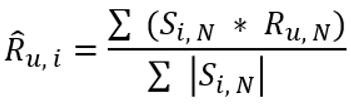
$\hat{R}_{u,i}$: 사용자 u, 아이템 i의 개인화된 예측 평점 값   
$S_{i,N}$: 아이템 i와 가장 유사도가 높은 Top-N개 아이템의 유사도 벡터   
$R_{u,N}$: 사용자 u의 아이템 i와 가장 유사도가 높은 Top-N개 아이템에 대한 실제 평점 벡터   
N : 아이템의 최근접 이웃 범위 계수 의미 / 특정 아이템과 유사도가 가장 높은 Top-N개의 다른 아이템 추출하는데 사용

In [54]:
# 사용자-영화 평점 넘파이 행렬과 영화 간 유사도를 가지는 넘파이 행렬을 입력받고 이를 위 식으로 개인화된 예측 평점 계산하는 함수 생성
def predict_rating(ratings_arr, item_sim_arr):
    ratings_pred = ratings_arr.dot(item_sim_arr)/np.array([np.abs(item_sim_arr).sum(axis=1)])
    return ratings_pred

In [55]:
ratings_pred = predict_rating(ratings_matrix.values, item_sim_df.values)
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index=ratings_matrix.index, columns=ratings_matrix.columns)
ratings_pred_matrix.head(3)
# 사용자별 영화의 실제 평점과 영화의 코사인 유사도를 내적한 값이므로 기존에 관람하지 않았던 영화도 값이 부여되는 경우 발생

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.070345,0.577855,0.321696,0.227055,0.206958,0.194615,0.249883,0.102542,0.157084,0.178197,...,0.113608,0.181738,0.133962,0.128574,0.006179,0.212070,0.192921,0.136024,0.292955,0.720347
2,0.018260,0.042744,0.018861,0.000000,0.000000,0.035995,0.013413,0.002314,0.032213,0.014863,...,0.015640,0.020855,0.020119,0.015745,0.049983,0.014876,0.021616,0.024528,0.017563,0.000000
3,0.011884,0.030279,0.064437,0.003762,0.003749,0.002722,0.014625,0.002085,0.005666,0.006272,...,0.006923,0.011665,0.011800,0.012225,0.000000,0.008194,0.007017,0.009229,0.010420,0.084501


In [56]:
# 예측 결과가 원래 실제 평점과 얼마나 차이가 있는지 확인 (MSE 사용)
# 기존에 평점이 부여된 데이터에 대해서만 오차 정도 측정
from sklearn.metrics import mean_squared_error

def get_mse(pred, actual):
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

print(get_mse(ratings_pred, ratings_matrix.values))

9.895354759094706


In [57]:
# MSE 감소시키는 방향으로 개선하기
# 특정 영화와 가장 비슷한 유사도를 가지는 영화에 대해서만 유사도 벡터 적용하는 함수로 변경
def predict_rating_topsim(ratings_arr, item_sim_arr, n=20):
    pred = np.zeros(ratings_arr.shape)
    
    for col in range(ratings_arr.shape[1]):
        top_n_items = [np.argsort(item_sim_arr[:,col])[:-n-1:-1]]
        
        for row in range(ratings_arr.shape[0]):
            pred[row, col] = item_sim_arr[col, :][top_n_items].dot(ratings_arr[row,:][top_n_items].T)
            pred[row, col] /= np.sum(np.abs(item_sim_arr[col,:][top_n_items]))

    return pred

In [58]:
ratings_pred = predict_rating_topsim(ratings_matrix.values, item_sim_df.values, n=20)
print(get_mse(ratings_pred, ratings_matrix.values))

ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index= ratings_matrix.index, columns=ratings_matrix.columns)
# 기존보다 많이 향상됨

3.6949999176225483


In [59]:
# 특정 사용자에 대해 영화 추천
# 9번 사용자가 어떤 영화를 좋아하는지 사용자가 평점을 준 영화를 평점 높은 순으로 나열
user_rating_id = ratings_matrix.loc[9, :]
user_rating_id[user_rating_id>0].sort_values(ascending=False)[:10]
# 전반적으로 흥행성이 좋은 영화에 높은 평점 줌 

title
Adaptation (2002)                                                                 5.0
Austin Powers in Goldmember (2002)                                                5.0
Lord of the Rings: The Fellowship of the Ring, The (2001)                         5.0
Lord of the Rings: The Two Towers, The (2002)                                     5.0
Producers, The (1968)                                                             5.0
Citizen Kane (1941)                                                               5.0
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    5.0
Back to the Future (1985)                                                         5.0
Glengarry Glen Ross (1992)                                                        4.0
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)                                     4.0
Name: 9, dtype: float64

In [60]:
# 사용자가 이미 평점 준 영화 제외하고 추천할 수 있도록 
# 평점 주지 않은 영화 리스트 객체로 반환하는 함수 생성
def get_unseen_movies(ratings_matrix, userId):
    user_rating = ratings_matrix.loc[userId,:]
    # 기존 관람한 영화 인덱스 추출
    already_seen = user_rating[user_rating > 0].index.tolist()
    
    movies_list = ratings_matrix.columns.tolist()
    
    unseen_list = [movie for movie in movies_list if movie not in already_seen]
    
    return unseen_list

In [61]:
# 최종적으로 영화 추천 함수 생셩
def recomm_movie_by_userid(pred_df, userId, unseen_list, top_n=10):
    recomm_movies = pred_df.loc[userId, unseen_list].sort_values(ascending=False)[:top_n]
    return recomm_movies

unseen_list = get_unseen_movies(ratings_matrix,9)

recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, 9, unseen_list, top_n=10)

recomm_movies = pd.DataFrame(data=recomm_movies.values , index=recomm_movies.index, columns=['pred_score'])

recomm_movies

,pred_score
title,
Shrek (2001),0.866202
Spider-Man (2002),0.857854
"Last Samurai, The (2003)",0.817473
Indiana Jones and the Temple of Doom (1984),0.816626
"Matrix Reloaded, The (2003)",0.800990
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001),0.765159
Gladiator (2000),0.740956
"Matrix, The (1999)",0.732693
Pirates of the Caribbean: The Curse of the Black Pearl (2003),0.689591


### 7. 행렬 분해를 이용한 잠재 요인 협업 필터링 실습
사용자-아이템 평점 행렬에는 사용자가 평점을 매기지 않은 널데이터가 많기 때문에 주로 SGD나 ALS기반의 행렬 분해 이용

In [62]:
# SGD기반의 행렬 분해 구현하고 이를 기반으로 사용자에게 영화 추천 
from sklearn.metrics import mean_squared_error

def get_rmse(R, P, Q, non_zeros):
    error = 0
    #두 개의 분해된 행렬 P와 Q.T의 내적으로 예측 R 행렬 생성
    full_pred_matrix = np.dot(P, Q.T)
    
    #실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출하여 실제 R 행렬과 예측 행렬의 RMSE 추출
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
      
    mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)
    
    return rmse

In [63]:
def matrix_factorization(R, K, steps=200, learning_rate=0.01, r_lambda = 0.01):
    num_users, num_items = R.shape
    #P와 Q 매트릭스의 크기를 지정하고 정규분포를 가진 랜덤한 값으로 입력
    np.random.seed(1)
    P = np.random.normal(scale=1./K, size=(num_users, K))
    Q = np.random.normal(scale=1./K, size=(num_items, K))

    break_count = 0
       
    #R > 0 인 행 위치, 열 위치, 값을 non_zeros 리스트 객체에 저장
    non_zeros = [(i, j, R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j] > 0]
   
    #SGD기법으로 P와 Q 매트릭스를 계속 업데이트. 
    for step in range(steps):
        for i, j, r in non_zeros:
            #실제 값과 예측 값의 차이인 오류 값을 구함
            eij = r - np.dot(P[i, :], Q[j, :].T)
            #Regularization을 반영한 SGD 업데이트 공식 적용
            P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
            Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])
       
        rmse = get_rmse(R, P, Q, non_zeros)
        if (step % 10) == 0 :
            print("### iteration step : ", step," rmse : ", rmse)
            
    return P, Q

In [65]:
import pandas as pd
import numpy as np

movies = pd.read_csv('./data/movies.csv')
ratings = pd.read_csv('./data/ratings.csv')
ratings = ratings[['userId', 'movieId', 'rating']]
ratings_matrix = ratings.pivot_table('rating', index='userId', columns='movieId')

#title 컬럼을 얻기 위해 movies 와 join 수행
rating_movies = pd.merge(ratings, movies, on='movieId')

#columns='title' 로 title 컬럼으로 pivot 수행 
ratings_matrix = rating_movies.pivot_table('rating', index='userId', columns='title')

In [ ]:
P, Q = matrix_factorization(ratings_matrix.values, K=50, steps=200, learning_rate=0.01, r_lambda = 0.01)
pred_matrix = np.dot(P, Q.T)

### iteration step :  0  rmse :  2.9023619751336867
### iteration step :  10  rmse :  0.7335768591017927
### iteration step :  20  rmse :  0.5115539026853442
### iteration step :  30  rmse :  0.37261628282537446
### iteration step :  40  rmse :  0.2960818299181014
### iteration step :  50  rmse :  0.2520353192341642
### iteration step :  60  rmse :  0.22487503275269854
### iteration step :  70  rmse :  0.2068545530233154
### iteration step :  80  rmse :  0.19413418783028688
### iteration step :  90  rmse :  0.18470082002720406
### iteration step :  100  rmse :  0.17742927527209104
### iteration step :  110  rmse :  0.1716522696470749
### iteration step :  120  rmse :  0.16695181946871723
### iteration step :  130  rmse :  0.16305292191997542
### iteration step :  140  rmse :  0.15976691929679646
### iteration step :  150  rmse :  0.1569598699945732
### iteration step :  160  rmse :  0.1545339818671543
### iteration step :  170  rmse :  0.15241618551077643
### iteration step :  180  rms

In [ ]:
ratings_pred_matrix = pd.DataFrame(data=pred_matrix, index= ratings_matrix.index, columns = ratings_matrix.columns)
ratings_pred_matrix.head(3)

In [ ]:
#사용자가 관람하지 않는 영화명 추출   
unseen_list = get_unseen_movies(ratings_matrix, 9)

#아이템 기반의 인접 이웃 협업 필터링으로 영화 추천 
recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, 9, unseen_list, top_n=10)

#평점 데이터를 DataFrame으로 생성
recomm_movies = pd.DataFrame(data=recomm_movies.values,index=recomm_movies.index,columns=['pred_score'])
recomm_movies
# 아이템 기반 협업 필터링 결과와 추천된 영화가 많이 다름